# Exercise 6.2
## Interpolation
In this task, we implement a simple NN to learn a complicated function.

In [ ]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

layers = keras.layers

plt.style.use("seaborn-v0_8")

### Generation of data

In [ ]:
def some_complicated_function(x):
    return (
        (np.abs(x)) ** 0.5
        + 0.1 * x
        + 0.01 * x ** 2
        + 1
        - np.sin(x)
        + 0.5 * np.exp(x / 10.0)
        ) / (0.5 + np.abs(np.cos(x)))

Let's simulate the train data

In [ ]:
N_train = 10**4  # number of training samples

rng = np.random.default_rng()

# Note: "[:, np.newaxis]" reshapes array to (N,1) as required by our DNN (we input one feature per sample)
xtrain = rng.uniform(-10, 10, N_train)[:, np.newaxis]
ytrain = some_complicated_function(xtrain) + rng.standard_normal(
    xtrain.shape
)  # train data includes some noise

In [ ]:
print(f"{xtrain.shape = }")
print(f"{ytrain.shape = }")

xtrain.shape = (10000, 1)
ytrain.shape = (10000, 1)


Simulate test data

In [ ]:
N_test = 10000  # number of testing samples

xtest = np.linspace(-10, 10, N_test)
ytest = some_complicated_function(xtest)

In [ ]:
print(f"{xtest.shape = }")
print(f"{ytest.shape = }")

xtest.shape = (10000,)
ytest.shape = (10000,)


### Define Model

Define the number of nodes, the number of layers, and choose an activation function.
Use `keras.regularizers` to use parameter norm penalties or add a dropout layer via `layers.Dropout(fraction)`.

You may use the skeleton below:

In [ ]:
nb_nodes = 32
nb_layers = 4
activation = "relu"
reg_strategy = keras.regularizers.l1_l2(l1=0.01, l2=0.01) #Using L1 and L2 regularization

model = keras.models.Sequential(name="1Dfit")
model.add(
    layers.Dense(
        nb_nodes,
        activation=activation,
        kernel_regularizer = reg_strategy,
        input_dim=xtrain.shape[1]
    )
)  # first layer

for i in range(nb_layers - 1):
  model.add(layers.Dense(nb_nodes, activation=activation, kernel_regularizer=reg_strategy))

model.add(layers.Dense(1))  # final layer

print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "1Dfit"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

None


We construct a fully-connected feed-forward neural network using KERAS. The model has 4 hidden layers with 32 nodes each, using the ReLU activation function to learn non-linear behavior. L1 and L2 regularization are included on all dense layers here to prevent overfitting. The final layer is a single linear output node suitable for regression. Overall, this architecture is deep enough to capture complex structure in the data while regularization helps ensure stable learning and smoother interpolation.

### Compile the model (set an objective and choose an optimizer)

Choose an optimizer from `keras.optimizers`, e.g., `adam = keras.optimizers.Adam(learning_rate=0.001)`.

Further, choose the correct objective (loss) for this <b>regression task</b>.

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="MeanSquaredError", optimizer=adam)

We compile the model by choosing the mean squared error (MSE) as the loss function, which is the correct choice for the regression task. The adam optimizer with learning rate of `0.001` is used to update the network parameters efficiently; Adam is well-suited for this problem because it adapts the step size during training and generally converges faster and more smoothly than basic gradient descent. Together, these choices ensure stable optimization and an appropriate measure of how well the network fits the target function.

### Train the model

Train the network for a couple of epochs and save the model several times in between.

In [ ]:
epochs = 100
save_period = 20   # after how many epochs the model should be saved?

chkpnt_saver = keras.callbacks.ModelCheckpoint(
    "weights-{epoch:02d}.weights.h5",
    save_weights_only=True,
    save_freq=save_period
)

results = model.fit(
    xtrain,
    ytrain,
    batch_size=64,
    epochs=epochs,
    verbose=1,
    callbacks=[chkpnt_saver]
)

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 16.0225
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.9142
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.1196
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.5757
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.4099
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.0585
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.8345
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.5491
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.3767
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.2475
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.1624
Epoch 12/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0441
Epoch 13/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0010
Epoch 14/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0477
Epoch 15/100
157/157 ━━━━━━━━━━━━━━━━━━━━

The model is trained for 100 epochs using mino-batches of 64 samples. During training, the loss steadily decreases as the network learns to approximate the underlying function. A checkpoint callback is used to save the model weights every 20 epochs, allowing us to later visualize how the prediction improves over time. Overall, training process shows stable convergence and a smooth reduction in the MSE loss.

Compare the performance of the model during the training. You may use the skeleton below:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


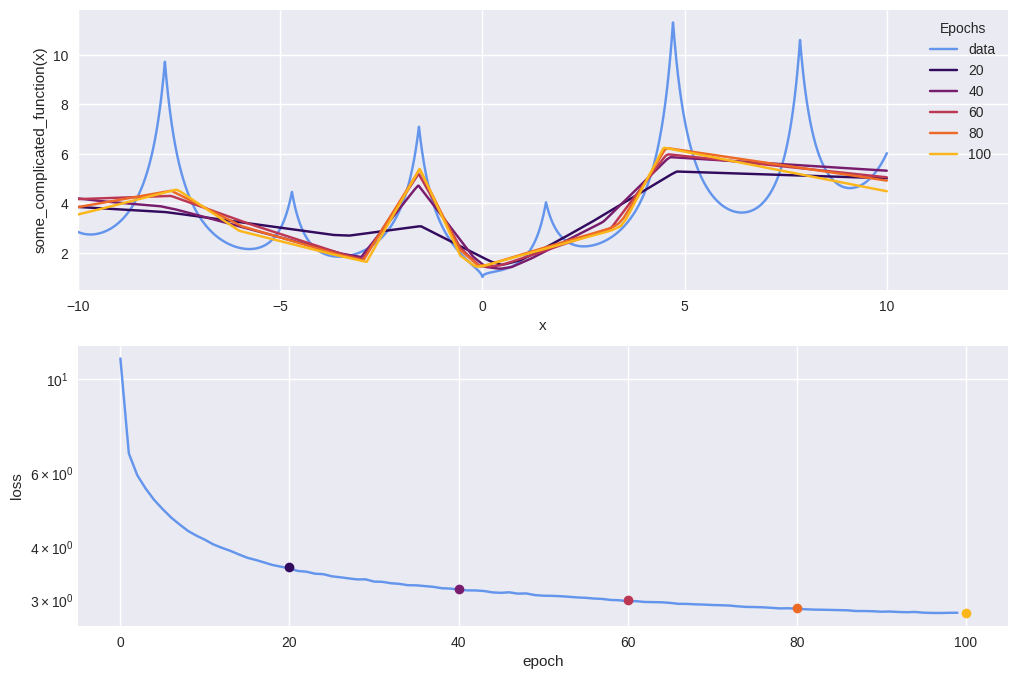

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8))

ax1.plot(xtest, ytest, color="#6495ED", label="data")
saved_epochs = range(save_period, epochs + 1, save_period)

colors = [
    plt.cm.inferno((i + 1) / float(len(saved_epochs) + 1))
    for i in range(len(saved_epochs))
]

for i, epoch in enumerate(saved_epochs):
    model.load_weights("weights-{epoch:02d}.weights.h5".format(epoch=epoch))
    ypredict = model.predict(xtest).squeeze()
    ax1.plot(xtest.squeeze(), ypredict, color=colors[i], label=epoch)
    ax2.plot(
        epoch,
        results.history["loss"][epoch - 1],
        color=colors[i],
        marker="o",
        zorder=10,
    )

ax1.set(xlabel="x", ylabel="some_complicated_function(x)", xlim=(-10, 13), title="")
ax1.grid(True)
ax1.legend(loc="upper right", title="Epochs")

ax2.plot(results.history["loss"], color="#6495ED")
ax2.set(xlabel="epoch", ylabel="loss")
ax2.grid(True)
ax2.semilogy()

plt.show()

By plotting the saved models at different epochs, we can see how the network gradually imporves its approximation of target function. Early in training, the predictions deviate from the true curve, but with increasing epochs the model becomes smoother and aligns more closely with the test data. The loss curve decreases steadily, showing stable convergences without signs of overfitting. Overall, the comparison demonstrates that the network learns the functional structure progressively and delivers increasingly accurate prediction over time.